# Color Histogram and features extraction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import pandas as pd

## Exploratory analysis

Text(0, 0.5, '# of Pixels')

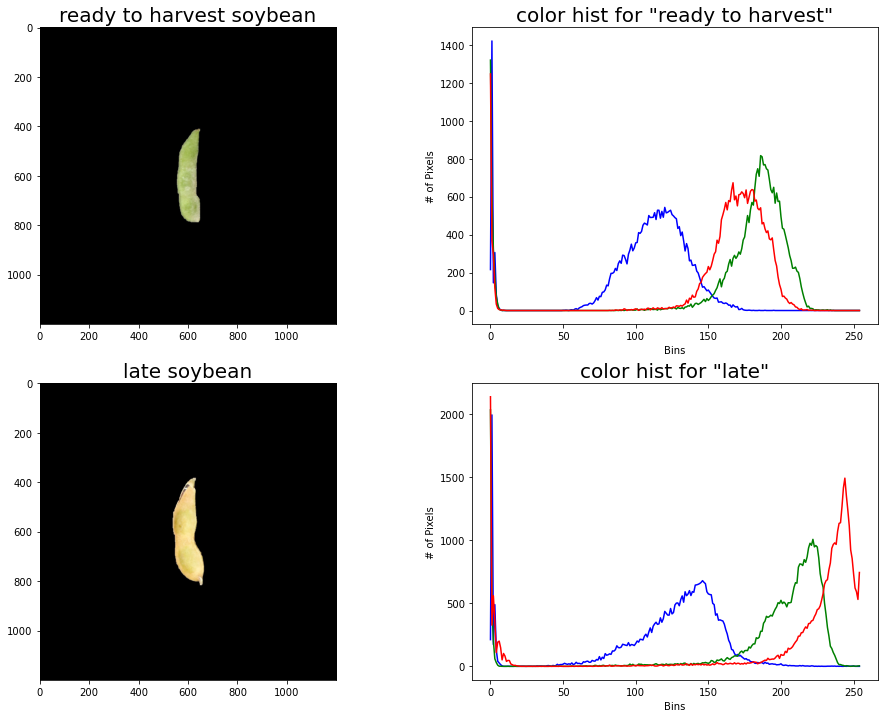

In [2]:
image1 = cv2.imread('../CroppedImageData/Crop_batch1_labeled/croped_IMG_1792_ready_11.jpg')
image2 = cv2.imread('../CroppedImageData/Crop_batch1_labeled/croped_IMG_1797_late_17.jpg')
channels_1 = cv2.split(image1)
channels_2 = cv2.split(image2)
colors = ("b", "g", "r")
plt.figure(figsize = (16,12))
plt.subplot(221)
plt.imshow(cv2.cvtColor(image1.copy(), cv2.COLOR_BGR2RGB))
plt.title('ready to harvest soybean',fontsize = 20)
plt.subplot(222)
for (channel, color) in zip(channels_1, colors):
    # Calculate histogram  (exclue black since too many pixels are black)
    hist = cv2.calcHist([channel], [0], None, [255], [1, 256])
    plt.plot(hist, color = color)
plt.title('color hist for "ready to harvest"',fontsize = 20)
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

plt.subplot(223)
plt.imshow(cv2.cvtColor(image2.copy(), cv2.COLOR_BGR2RGB))
plt.title('late soybean',fontsize = 20)
plt.subplot(224)
for (channel, color) in zip(channels_2, colors):
    # Calculate histogram 
    hist = cv2.calcHist([channel], [0], None, [255], [1, 256])
    plt.plot(hist, color = color)
plt.title('color hist for "late"',fontsize = 20)
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

In [3]:
channels_1

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

## Extract color hist features

In [4]:
def colorHistFeatures(image):
    features = []      
    ## 1st bin (R=0-32,G=0-32,B=0-32),2nd bin (R=33-64,G=0-32,B=0-32)--> totally 512 bins
    hist = cv2.calcHist([image], [0, 1, 2], None, (4, 4, 4), [1, 256, 1, 256, 1, 256])
    attributeList = []
    attributeNum = 1
    for B in np.arange(hist.shape[0]):
        for G in np.arange(hist.shape[1]):
            for R in np.arange(hist.shape[2]):
                r = 'R=' + str(R*64).zfill(3) + '-' + str((R+1)*64-1).zfill(3)
                g = 'G=' + str(G*64).zfill(3) + '-' + str((G+1)*64-1).zfill(3)
                b = 'B=' + str(B*64).zfill(3) + '-' + str((B+1)*64-1).zfill(3)
                if attributeNum == 148:
                    print('(' + r +  ', ' + g + ', ' + b + '): ', int(hist[B, G, R]))
                attributeList.append((attributeNum,r,g,b))
                attributeNum += 1
#     hist = cv2.calcHist([image],[0,1,2],None,[256,256,256],[0,256,0,256,0,256])
    hist = cv2.normalize(hist, hist).flatten()
    features.extend(hist)
    return features,attributeList

In [5]:
# print(len(colorHistFeatures(image1)))
features1,list1 = colorHistFeatures(image1)
features2,list2 = colorHistFeatures(image2)
features = []
features.append(features1)
features.append(features2)
df = pd.DataFrame(features,columns = list1)
df.head()

,"(1, R=000-063, G=000-063, B=000-063)","(2, R=064-127, G=000-063, B=000-063)","(3, R=128-191, G=000-063, B=000-063)","(4, R=192-255, G=000-063, B=000-063)","(5, R=000-063, G=064-127, B=000-063)","(6, R=064-127, G=064-127, B=000-063)","(7, R=128-191, G=064-127, B=000-063)","(8, R=192-255, G=064-127, B=000-063)","(9, R=000-063, G=128-191, B=000-063)","(10, R=064-127, G=128-191, B=000-063)",...,"(55, R=128-191, G=064-127, B=192-255)","(56, R=192-255, G=064-127, B=192-255)","(57, R=000-063, G=128-191, B=192-255)","(58, R=064-127, G=128-191, B=192-255)","(59, R=128-191, G=128-191, B=192-255)","(60, R=192-255, G=128-191, B=192-255)","(61, R=000-063, G=192-255, B=192-255)","(62, R=064-127, G=192-255, B=192-255)","(63, R=128-191, G=192-255, B=192-255)","(64, R=192-255, G=192-255, B=192-255)"
0,0.034496,0.000000,0.0,0.0,0.0,0.003201,0.000392,0.0,0.0,0.000849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000065
1,0.021700,0.000693,0.0,0.0,0.0,0.004479,0.001293,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012605


## Batch processing

In [8]:
def batchExtractColorFeatures(inputDir,outputDir,filename):
    imread_failed = []
    features = []
    index = []
    df = pd.DataFrame(columns = range(1,65))
    if os.path.isdir(outputDir):
        pass
    else:
        os.mkdir(outputDir)
    for (path,dirname,filenames) in os.walk(inputDir):
        for image in filenames:
            try:
                src = path + image
                imgName = image.split('.')[0]
                img = cv2.imread(src)
                feature,attributes = colorHistFeatures(img) 
                features.append(feature)
                index.append(imgName)
                df = pd.DataFrame(features,columns = attributes,index = index)
                df.index.name = 'Image'
                df.to_csv(outputDir+filename)
            except:
                imread_failed.append(image)
    display(df)

In [9]:
batchExtractColorFeatures('../testTrainingData_batch5/','../csvFiles/','ColorHistFeatures_batch5.csv')

,"(1, R=000-063, G=000-063, B=000-063)","(2, R=064-127, G=000-063, B=000-063)","(3, R=128-191, G=000-063, B=000-063)","(4, R=192-255, G=000-063, B=000-063)","(5, R=000-063, G=064-127, B=000-063)","(6, R=064-127, G=064-127, B=000-063)","(7, R=128-191, G=064-127, B=000-063)","(8, R=192-255, G=064-127, B=000-063)","(9, R=000-063, G=128-191, B=000-063)","(10, R=064-127, G=128-191, B=000-063)",...,"(55, R=128-191, G=064-127, B=192-255)","(56, R=192-255, G=064-127, B=192-255)","(57, R=000-063, G=128-191, B=192-255)","(58, R=064-127, G=128-191, B=192-255)","(59, R=128-191, G=128-191, B=192-255)","(60, R=192-255, G=128-191, B=192-255)","(61, R=000-063, G=192-255, B=192-255)","(62, R=064-127, G=192-255, B=192-255)","(63, R=128-191, G=192-255, B=192-255)","(64, R=192-255, G=192-255, B=192-255)"
Image,,,,,,,,,,,,,,,,,,,,,
2098late4,0.154079,0.134543,0.0,0.0,0.000251,0.843422,0.018978,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2076late6,0.124970,0.091787,0.0,0.0,0.001123,0.589854,0.001193,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000023
2144disease7,0.023643,0.001976,0.0,0.0,0.000013,0.122168,0.010598,0.0,0.0,0.007936,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000975
2076late5,0.115481,0.020120,0.0,0.0,0.000264,0.397107,0.031032,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000027,0.000007,0.0,0.0,0.000000,0.001390
2044ready5,0.035803,0.000950,0.0,0.0,0.004218,0.069289,0.000000,0.0,0.0,0.067763,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000274
2039ready13,0.111461,0.000647,0.0,0.0,0.057659,0.574470,0.000000,0.0,0.0,0.005890,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000492,0.003948
2039ready12,0.068578,0.000120,0.0,0.0,0.009052,0.081992,0.000000,0.0,0.0,0.046616,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2038ready3,0.242282,0.000000,0.0,0.0,0.092048,0.872705,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000060,0.000000,0.0,0.0,0.000181,0.008259
2063ready6,0.064578,0.000380,0.0,0.0,0.010057,0.273975,0.000000,0.0,0.0,0.056397,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000104,0.001876
